In [1]:
from keras.datasets import mnist
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


<function matplotlib.pyplot.show(*args, **kw)>

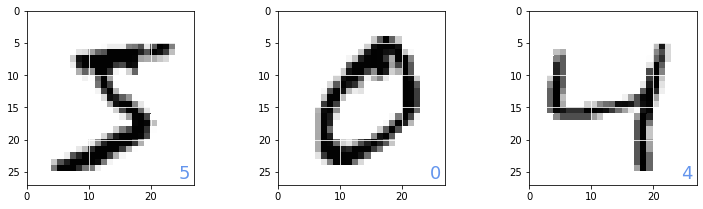

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" %y_train[id],
            color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784) # (A)
x_train = x_train.astype('float32') # (B)
x_train = x_train / 255 # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # (D)

x_test = x_test.reshape(10000, 784) # (A)
x_test = x_test.astype('float32') # (B)
x_test = x_test / 255 # (C)
y_test = np_utils.to_categorical(y_test, num_classes) 

In [4]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # (D)

In [5]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 2.0609 - accuracy: 0.2891 - val_loss: 1.7852 - val_accuracy: 0.5012
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 1.6047 - accuracy: 0.6524 - val_loss: 1.4363 - val_accuracy: 0.7675
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 1.3184 - accuracy: 0.7885 - val_loss: 1.1973 - val_accuracy: 0.8202
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 1.1122 - accuracy: 0.8249 - val_loss: 1.0181 - val_accuracy: 0.8445
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.9535 - accuracy: 0.8438 - val_loss: 0.8786 - val_accuracy: 0.8589
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.8300 - accuracy: 0.8590 - val_loss: 0.7711 - val_accuracy: 0.8710
Epoch 7/10
60000/60000 [==============================] - 1s 15us/st

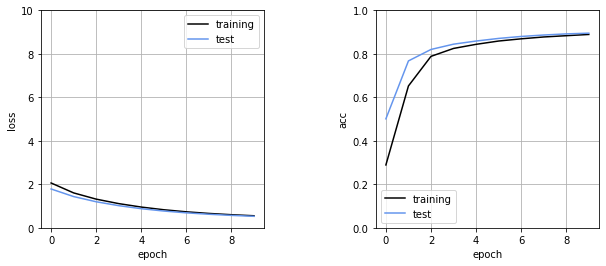

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [1]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
            plt.xlim(0, 27)
            plt.ylim(27, 0)
            plt.xticks([], "")
            plt.yticks([], "")

show_prediction()
plt.show()
# 뒤집어져서 나옴

NameError: name 'model' is not defined

In [8]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 1.5009 - accuracy: 0.5621 - val_loss: 0.8035 - val_accuracy: 0.8289
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.6134 - accuracy: 0.8561 - val_loss: 0.4680 - val_accuracy: 0.8845
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4309 - accuracy: 0.8877 - val_loss: 0.3759 - val_accuracy: 0.9029
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3644 - accuracy: 0.9006 - val_loss: 0.3330 - val_accuracy: 0.9105
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3292 - accuracy: 0.9083 - val_loss: 0.3069 - val_accuracy: 0.9157
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.3061 - accuracy: 0.9143 - val_loss: 0.2903 - val_accuracy: 0.9188
Epoch 7/10
60000/60000 [==============================] - 1s 16us/st

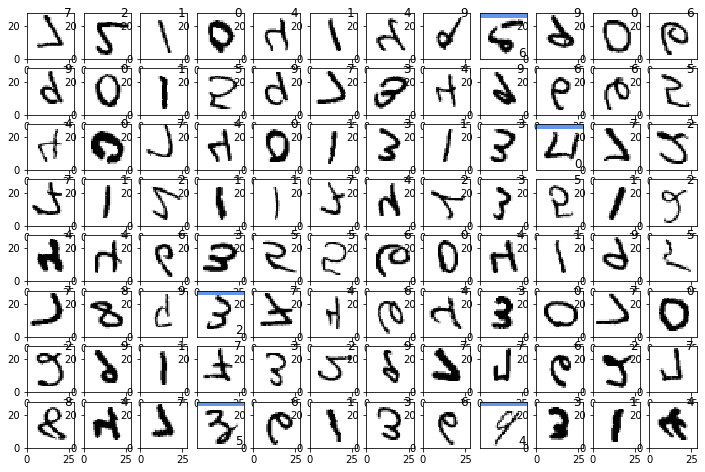

In [9]:
show_prediction()
plt.show()

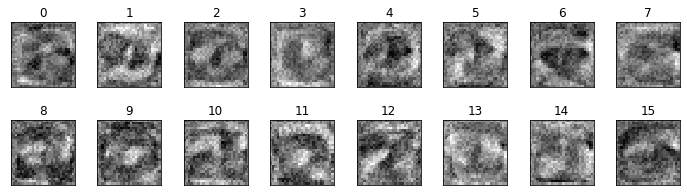

In [10]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

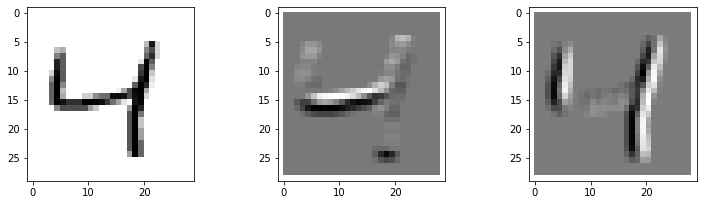

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]], dtype=float) # (B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1))

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [14]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu')) # (A)
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Computation time:{0:.3f} sec'.format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.9090 - accuracy: 0.7889 - val_loss: 0.3637 - val_accuracy: 0.8994
Epoch 2/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.3227 - accuracy: 0.9088 - val_loss: 0.2703 - val_accuracy: 0.9246
Epoch 3/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.2550 - accuracy: 0.9284 - val_loss: 0.2228 - val_accuracy: 0.9362
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.2111 - accuracy: 0.9412 - val_loss: 0.1887 - val_accuracy: 0.9476
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1765 - accuracy: 0.9509 - val_loss: 0.1631 - val_accuracy: 0.9553
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1513 - accuracy: 0.9581 - val_loss: 0.1395 - val_accuracy: 0.9623
Epoch 7/20
60000/60000 [==============================] - 9s 

In [2]:
show_prediction()
plt.show()

NameError: name 'model' is not defined

In [ ]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")
w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Computation time:{0:.3f} sec'.format(time.time() - startTime))

In [ ]:
show_prediction()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 ------------------------------------------------
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3,3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 누적 확률
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])
        
# 데이터를 그리기 --------------------------------------
def show_data(x):
    plt.plot(x[:, 0], x[:, 1], linestyle='none', marker='o', markersize=6, markeredgecolor='black', color='gray', alpha=0.8)
    plt.grid(True)
    
# 메인 ---------------------------------------------------------------

plt.figure(1, figsize=(4, 4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X=X, X_range0=X_range0, X_range1=X_range1)

In [ ]:
# Mu 및 R 초기화 ------------------------------------------------------
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]]) # (A)
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)] # (B)

In [ ]:
# 데이터를 그리는 함수 -----------------------------------------------------------
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포의 묘사
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1], marker='o', markerfacecolor=X_col[k], markeredgecolor='k', markersize=6, alpha=0.5, linestyle='none')
        # 데이터의 평균을 '별표'로 묘사
        plt.plot(mu[k, 0], mu[k, 1], marker='*', markerfacecolor=X_col[k], markersize=15, markeredgecolor='k', markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)
    
# ---------------------------------------------------------------------
plt.figure(figsize=(4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show

In [ ]:
# r을 정한다 (Step 1) --------------------------
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0]) **2 + (x1[n] - mu[k, 1]) **2
        r[n, np.argmin(wk)] = 1
    return r


# ---------------------------------------------------------
plt.figure(figsize=(4, 4))
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt. title('Step 1')
plt.show()

In [ ]:
# Mu 결정 (Step 2) --------------------------------------
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2))
    for k in range(K):
        mu[k, 0] = np.sum(r[:, k] * x0) / np.sum(r[:, k])
        mu[k, 1] = np.sum(r[:, k] * x1) / np.sum(r[:, k])
    return mu

# -----------------------------------------------------------------------
plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step2')
plt.show()

In [ ]:
plt.figure(1, figsize=(10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6 # 반복 횟수
for it in range(0, max_it):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    show_prm(X, R, Mu, X_col)
    plt.title("{0:d}".format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.yticks(range(X_range1[0], X_range1[1]), "")
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

In [ ]:
# 목적 함수 -------------------------------------------------------------------------------------
def distortion_measure(x0, x1, r, mu):
    #입력은 2차원으로 제한하고 있다
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n, k] * ((x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2)
    return J

# ------- test
# ------- Mu와 R의 초기화
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
distortion_measure(X[:, 0], X[:, 1], R, Mu)

In [ ]:
N = X.shape[0]
K = 3
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # 왜곡 척도의 계산 결과를 넣는다
for it in range(0, max_it): # K-means 기법
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    DM[it] = distortion_measure(X[:, 0], X[:, 1], R, Mu) # 왜곡 척도
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
print(np.round(DM, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(DM, color='black', linestyle='-', marker='o')
plt.ylim(40, 80)
plt.grid(True)
plt.show()

In [ ]:
%reset

In [ ]:
import numpy as np
wk = np.load('data_ch9.npz')
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

In [ ]:
# 가우스 함수 -------------------------------------------------
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi) ** (D / 2)
    c2 = 1 / (np.linalg.det(sigma) ** (1 / 2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

In [ ]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

In [ ]:
# 가우시안 혼합 모델 ---------------------------------------------
def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p

In [ ]:
# test -----------------------------------------------------------
x = np.array([[1, 2], [2, 2], [3, 4]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]])
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 1]]])
print(mixgauss(x, pi, mu, sigma))

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
# 혼합 가우스 등고선 표시 -----------------------------------------------------
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    plt.contour(x0, x1, f, 10, colors='gray')
    

# 혼합 가우스 3D 표시 ------------------------------------------------------------
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3, color='blue', edgecolor='black')

In [ ]:
# test -------------------------------------------------------------------
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array([[[.5, 0], [0, .5]], [[1, 0.25], [0.25, .5]], [[.5, 0], [0, .5]]])


Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)


Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

In [ ]:
# 초기 설정 ----------------------------------------------------------------------
N = X.shape[0]
K = 3
Pi = np.array([0.33, 0.33, 0.34])
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]


X_col=np.array([[0.4, 0.6, 0.95], [1, 1, 1], [0, 0, 0]])


# 데이터를 그리기 ----------------------------------------------------------
def show_mixgauss_prm(x, gamma, pi, mu, sigma):
    N, D = x.shape
    show_contour_mixgauss(pi, mu, sigma)
    for n in range(N):
        col = gamma[n, 0] * X_col[0] + gamma[n, 1] * X_col[1] + gamma[n, 2] * X_col[2]
        plt.plot(x[n, 0], x[n, 1], 'o', color=tuple(col), markeredgecolor='black', markersize=6, alpha = 0.5)
    for k in range(K):
        plt.plot(mu[k, 0], mu[k, 1], marker='*', markerfacecolor=tuple(X_col[k]), markersize=15, markeredgecolor='k', markeredgewidth=1)
        
    plt.grid(True)
    
    
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

In [ ]:
# gamma를 갱신(E Step) -----------------------------------------------
def e_step_mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) #KxN
    gamma = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = pi[k] * y[n, k]
        gamma[n, :] = wk / np.sum(wk)
    return gamma


# 메인 -----------------------------------------------------------------------------
Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)

In [ ]:
# 표시 --------------------------------------------------------------------------------
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

In [ ]:
# Pi, Mu, Sigma 갱신 (M step) --------------------
def m_step_mixgauss(x, gamma):
    N, D = x.shape
    N, K = gamma.shape
    # pi를 계산
    pi = np.sum(gamma, axis=0) / N
    # mu를 계산
    mu = np.zeros((K, D))
    for k in range(K):
        for d in range(D):
            mu[k, d] = np.dot(gamma[:, k], x[:, d]) / np.sum(gamma[:, k])
    # sigma를 계산
    sigma = np.zeros((K, D, D))
    for k in range(K):
        for n in range(N):
            wk = x - mu[k, :]
            wk = wk[n, :, np.newaxis]
            sigma[k, :, :] = sigma[k, :, :] + gamma[n, k] * np.dot(wk, wk.T)
        sigma[k, :, :] = sigma[k, :, :] / np.sum(gamma[:, k])
    return pi, mu, sigma


# 메인 -----------------------------------------------------------------------
Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)

In [ ]:
# 표시 --------------------------------------------------------------------------------
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

In [ ]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
plt.figure(1, figsize=(10, 6.5))
max_it = 20 # 반복 횟수


i_subplot = 1;
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
    if it<4 or it>17:
        plt.subplot(2, 3, i_subplot)
        show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
        plt.title("{0:d}".format(it + 1))
        plt.xticks(range(X_range0[0], X_range0[1]), "")
        plt.yticks(range(X_range1[0], X_range1[1]), "")
        i_subplot = i_subplot + 1
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)
plt.show()

In [ ]:
# 혼합 가우스의 목적 함수 -----------------------------------------------
def nlh_mixgauss(x, pi, mu, sigma):
    # x : NxD
    # pi : Kx1
    # mu : KxD
    # sigma : KxDxD
    # output lh : NxK
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) #KxN
    lh = 0
    for n in range(N):
        wk = 0
        for k in range(K):
            wk = wk + pi[k] * y[n, k]
        lh = lh + np.log(wk)
    return -lh

In [ ]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]


max_it = 20
it = 0
Err = np.zeros(max_it) # distortion measure
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
    Err[it] = nlh_mixgauss(X, Pi, Mu, Sigma)
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)
print(np.round(Err, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(np.arange(max_it) + 1, Err, color='k', linestyle='-', marker='o')
# plt.ylim([40, 80])
plt.grid(True)
plt.show()